<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>

In [2]:
# read data, transform
asset_price_data = pd.read_csv("asset_price_data.csv")
asset_price_data_melt = pd.melt(asset_price_data, 
                        id_vars=["date"], value_vars=["Asset1", "Asset2", "Asset3", 
                        "Asset4", "Asset5"], var_name="Asset", value_name="Value")

In [3]:
# cleaning, convert to relative values
filled_price_data = asset_price_data.copy()
filled_price_data = filled_price_data.fillna(method="bfill")
filled_price_data = filled_price_data.fillna(method="ffill")
price_data_relative = filled_price_data.copy()
price_data_relative["date"] = pd.to_datetime(price_data_relative["date"])
start_values = price_data_relative.iloc[0]
price_data_relative = price_data_relative.set_index("date")
price_data_relative = price_data_relative / start_values *100
price_data_relative = price_data_relative.drop(columns="date")
price_data_relative = price_data_relative.reset_index()
price_data_relative_melt = pd.melt(price_data_relative, 
                        id_vars=["date"], value_vars=["Asset1", "Asset2", "Asset3", 
                        "Asset4", "Asset5"], var_name="Asset", value_name="Value")

/var/folders/4d/kvxdy8f57vb9008_7qx5gx780000gn/T/ipykernel_9571/436425343.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_price_data = filled_price_data.fillna(method="bfill")
/var/folders/4d/kvxdy8f57vb9008_7qx5gx780000gn/T/ipykernel_9571/436425343.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_price_data = filled_price_data.fillna(method="ffill")


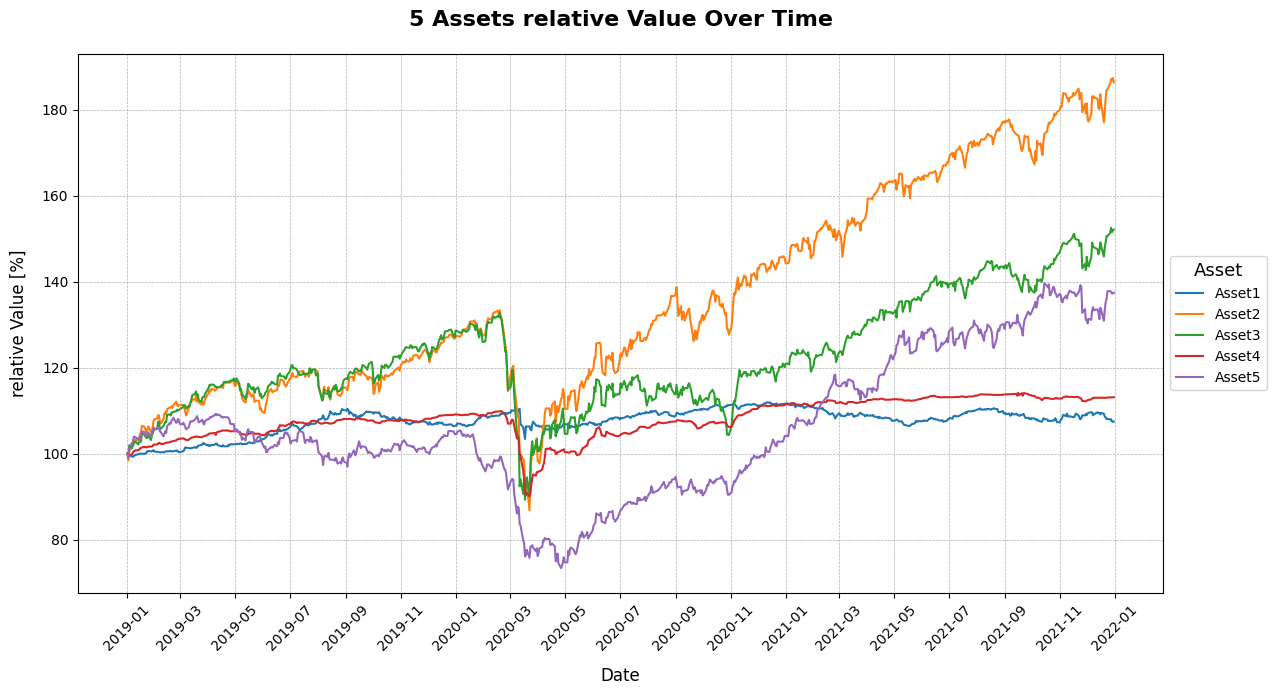

In [4]:
# plotting the data with relative values to make it comparable
plt.figure(figsize=(14, 7))
sns.lineplot(data=price_data_relative_melt, x='date', y='Value', hue="Asset")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('5 Assets relative Value Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('relative Value [%]', fontsize=12, labelpad=10)
plt.legend(title='Asset', title_fontsize='13', fontsize='10', loc='center left', bbox_to_anchor=(1, 0.5))
ax = plt.gca()
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

### Interpretation
on the graph we see two assets characterized by their stability, with minimal fluctuations and without much price gain (Asset 1 and Asset 4).  
In contrast, the three other assets show more volatility. They experience a substantial decline in value (at the start of the covid pandemic) and gain value fast after. This underlines the big market uncertainty in the pandemic.

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

In [5]:
daily_returns = filled_price_data.copy()
daily_returns2 = filled_price_data.copy()
daily_returns = daily_returns.set_index("date")
daily_returns2 = daily_returns2.set_index("date")

In [6]:
# calculating daily returns
daily_returns.iloc[0] = 0
for i in range(1, len(daily_returns)):
    daily_returns.iloc[i] = (daily_returns2.iloc[i] - daily_returns2.iloc[i-1]) / daily_returns2.iloc[i-1] * 100
daily_returns.head(3)

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

In [7]:
# correlation matrix as a table
correlation_matrix = daily_returns.corr()
correlation_matrix

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,-0.088337,-0.061251,0.103617,-0.107506
Asset2,-0.088337,1.000000,0.852492,0.526538,0.591168
Asset3,-0.061251,0.852492,1.000000,0.511728,0.556717
Asset4,0.103617,0.526538,0.511728,1.000000,0.419010
Asset5,-0.107506,0.591168,0.556717,0.419010,1.000000


### Interpretation
The graph clearly shows a strong correlation between asset 2 and asset 3, as both show similar movements. They share the dip and also the price rally afterwards.  
Because of this we see a strong correlation of these two assets. 

In [8]:
# correlation matrix as a heat map if needed
"""
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for 5 Assets")
"""

'\nplt.figure(figsize=(18, 15))\nsns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")\nplt.title("Correlation Heatmap for 5 Assets")\n'

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

In [9]:
# prepare data of asset1 and asset2 for plot
melt_daily_returns = daily_returns.copy()
melt_daily_returns = melt_daily_returns.reset_index()
melt_daily_returns["date"] = pd.to_datetime(melt_daily_returns["date"])
melt_daily_returns = pd.melt(melt_daily_returns, id_vars="date", value_vars=["Asset1", "Asset2"], 
                            var_name="Asset", value_name="Value")

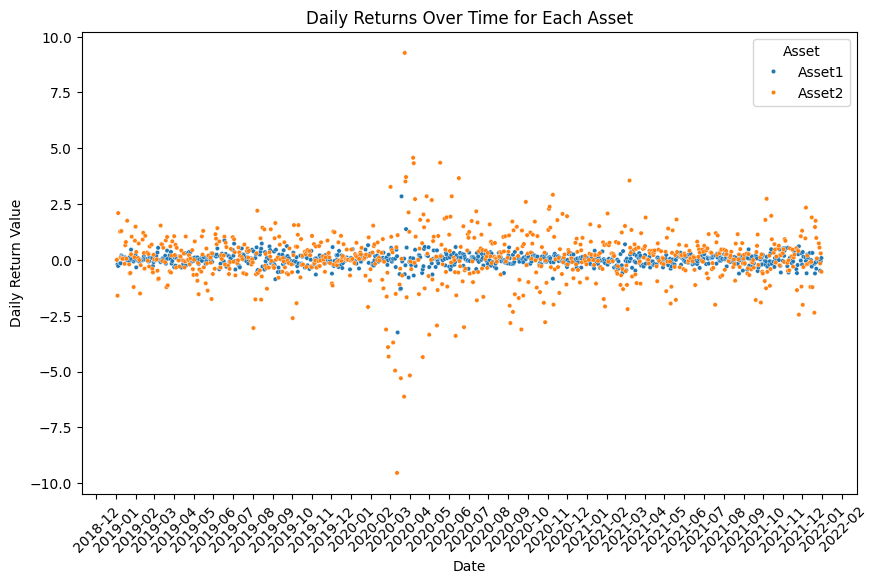

In [10]:
# scatterplot of two assets
plt.figure(figsize=(10, 6))
sns.scatterplot(data=melt_daily_returns, x="date", y="Value", hue="Asset", s=10)
plt.title('Daily Returns Over Time for Each Asset')
plt.xlabel('Date')
plt.ylabel('Daily Return Value')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


### Interpretation
In this graph, asset 2 is noticeably more volatile than asset 1. It shows a much higher standard deviation, reflecting greater price variability. Additionally, Asset 2 has a larger price range. Times of big market fluctuations can be seen in this graph around the start of 2020 which marks the start of the covid pandemic.

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [11]:
# loading data
weights = pd.read_csv("portfolio_weights.csv")
weights.head(3)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974


<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

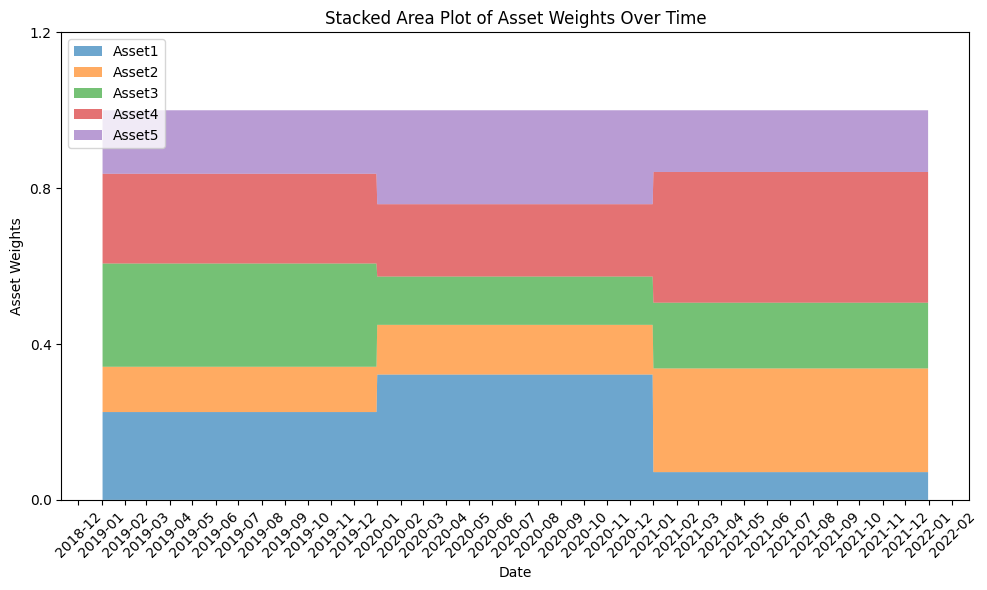

In [12]:
# creating stacked plot of assets
weights["date"] = pd.to_datetime(weights["date"])
x = weights["date"]
y = [weights["Asset1"], weights["Asset2"], weights["Asset3"], weights["Asset4"], weights["Asset5"]]
plt.figure(figsize=(10, 6))


plt.stackplot(x, y, labels=['Asset1','Asset2','Asset3', "Asset4", "Asset5"], alpha=0.65)
plt.legend(loc='upper left')

plt.title('Stacked Area Plot of Asset Weights Over Time')
plt.xlabel('Date')
plt.ylabel('Asset Weights')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set location to months, adjust if needed
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.gca().set_yticks(plt.gca().get_yticks()[::2])  # Show every second label
plt.tight_layout()


### Interpretation
here we see how the assets are weighed. the change of weights around the start of 2020 seems to be tactical as there is more weight of asset 1 which later stays stable and less weight of asset 3 which later drops in value. 

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
- Plot the historical cumulative returns of the portfolio.


In [13]:
# set first value to 1 to have a start point
weights = weights.set_index("date")
weights.head(3)
daily_returns_3 = daily_returns.copy()
daily_returns_3.iloc[0] = 1

In [14]:
# calculate weighted daily returns and cumulative sum, starting at 100%
cumulative = pd.DataFrame(daily_returns_3.values*weights.values, 
            columns=daily_returns_3.columns, index=daily_returns_3.index)
cumulative_sum = cumulative["Asset1"] + cumulative["Asset2"] + cumulative["Asset3"] + cumulative["Asset4"] + cumulative["Asset5"]
cumulative_sum.iloc[0] = 100
cs = cumulative_sum.cumsum()
cs = cs.reset_index().rename(columns={0: "value"})
cs["date"] = pd.to_datetime(cs["date"])

/var/folders/4d/kvxdy8f57vb9008_7qx5gx780000gn/T/ipykernel_9571/2765475261.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cs, x='date', y='value', ci=None)


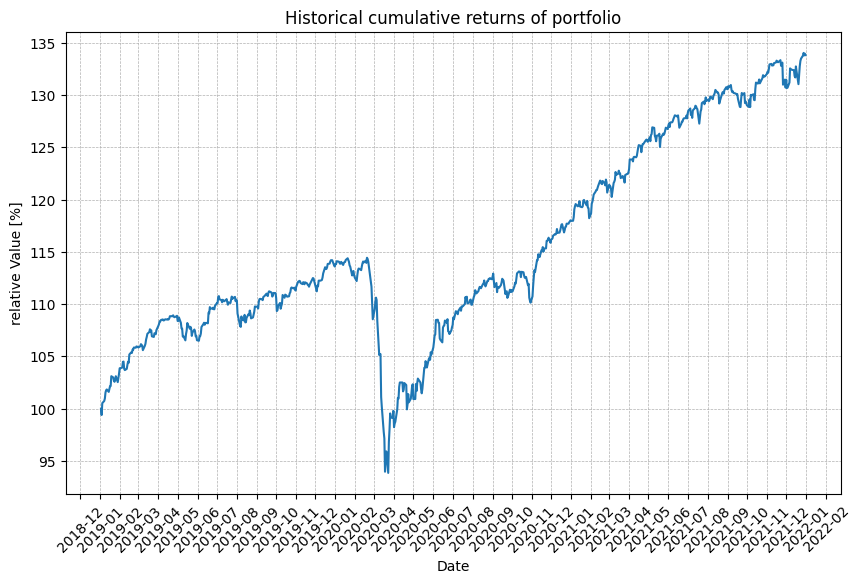

In [15]:
# plot of cumulative sum of the returns
plt.figure(figsize=(10, 6))
sns.lineplot(data=cs, x='date', y='value', ci=None)
plt.title('Average Sale Price over Years of Construction')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Historical cumulative returns of portfolio')
plt.xlabel('Date')
plt.ylabel('relative Value [%]')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()

### Interpretation
At the start of the pandemic, the value of the portfolio shows a dip. The impact of this decline is mitigated by an adjustment in the asset weights as stated before. This strategic change in allocation helps to limit the damage.  Aside from this one dip, the value demonstrates a consistent upward trend. For the rest of the period, it rises steadily.

<h2 style="color: #FF6347;">Annualized Return.</h2>
- Calculate the annualized return of the portfolio.


In [16]:
# calculating total return and time period
total_return = cs["value"].iloc[len(cs)-1] / 100
start = cs["date"].iloc[0]
end = cs["date"].iloc[len(cs)-1]
diff = end - start
diff = diff.days / 365.25

In [17]:
annualized_return = (((total_return ** (1 / diff)) -1) * 100).round(2)
print(f"annualized return in % is {annualized_return}")

annualized return in % is 10.22


### Interpretation
The annual return of 10% is considered average for portfolios. It could have been higher but the dip at the start of the pandemic impacted performance. So overall, achieving a 10% return is still a good result.

<h2 style="color: #FF6347;">Annualized Volatility.</h2>
Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).

In [18]:
std = cumulative_sum.std()
annualized_volatility = (std * np.sqrt(261)).round(2)
print(f" annualized volatility is {annualized_volatility}")

 annualized volatility is 58.33


### Interpretation
The annualized volatility of 58 might initially appear high. However, this value is within expectations considering the significant dip at the start of 2020. The volatility shows the volatile market during the pandemic period.

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [19]:
# read data
information = pd.read_csv("asset_information_data.csv")

In [20]:
# group data, weight
grouped_weights = weights.copy()
grouped_weights["fixed_income"] = grouped_weights["Asset1"] + grouped_weights["Asset2"]
grouped_weights["equity"] = grouped_weights["Asset3"] + grouped_weights["Asset4"]
grouped_weights["alternative"] = grouped_weights["Asset5"]
grouped_weights = grouped_weights.drop(columns=["Asset1", "Asset2", "Asset3", "Asset4", "Asset5"])
grouped_weights = grouped_weights.reset_index()

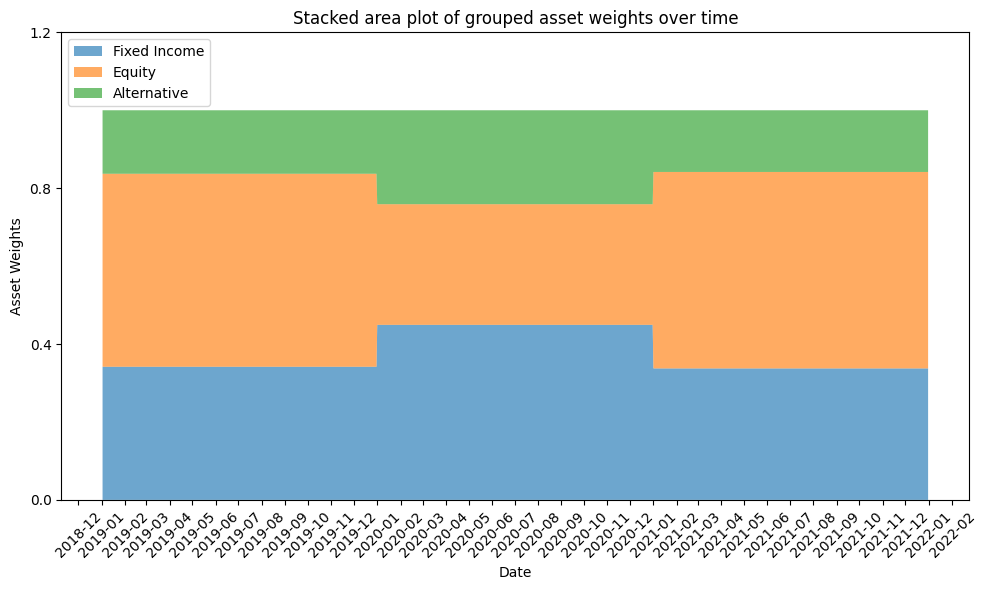

In [21]:
# plot data
grouped_weights["date"] = pd.to_datetime(grouped_weights["date"])
x = grouped_weights["date"]
y = [grouped_weights["fixed_income"], grouped_weights["equity"], grouped_weights["alternative"]]
plt.figure(figsize=(10, 6))


plt.stackplot(x, y, labels=["Fixed Income","Equity","Alternative"], alpha=0.65)
plt.legend(loc='upper left')

plt.title('Stacked area plot of grouped asset weights over time')
plt.xlabel('Date')
plt.ylabel('Asset Weights')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set location to months, adjust if needed
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.gca().set_yticks(plt.gca().get_yticks()[::2])  # Show every second label
plt.tight_layout()


### Interpretation
this graph shows how the weight of the portfolio shifts towards save fixed income when markets become turbulent at the start of the pandemic. after the markets are stabilized the weight shifts more towards equity.